<a href="https://colab.research.google.com/github/arunravi8595/CE888/blob/main/Lab_6/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns
from google.colab import files


In [1]:
!git clone https://github.com/arunravi8595/CE888.git

Cloning into 'CE888'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (241/241), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 241 (delta 111), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (241/241), 1.54 MiB | 7.98 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [5]:
country_data = pd.read_csv('/content/CE888/Lab_6/Country-data.csv')
data_dictionary = pd.read_csv('/content/CE888/Lab_6/data-dictionary.csv')

In [6]:
country_data= pd.DataFrame(country_data)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
x = country_data.iloc[:, 1:10]
y = country_data.iloc[:, 0:1]

In [11]:
print(x.head())
print(y.head())

   child_mort  exports  health  ...  life_expec  total_fer   gdpp
0        90.2     10.0    7.58  ...        56.2       5.82    553
1        16.6     28.0    6.55  ...        76.3       1.65   4090
2        27.3     38.4    4.17  ...        76.5       2.89   4460
3       119.0     62.3    2.85  ...        60.1       6.16   3530
4        10.3     45.5    6.03  ...        76.8       2.13  12200

[5 rows x 9 columns]
               country
0          Afghanistan
1              Albania
2              Algeria
3               Angola
4  Antigua and Barbuda


In [13]:
k_means=cluster.KMeans(n_clusters=3)
k_means.fit(x)
print(k_means.labels_)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


In [14]:
y_predict=k_means.predict(x)
print(y_predict)

[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


In [15]:
print("Completeness score: %0.3f" % metrics.completeness_score(y['country'], k_means.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, k_means.labels_))

Completeness score: 1.000
Silhouette Coefficient: 0.700


**Compare data between Imports and Exports among the countries and cluster them into 3 groups**

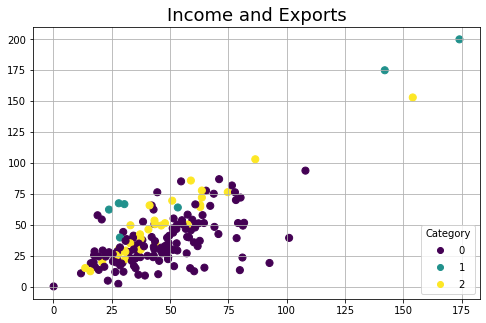

In [26]:
plt.figure(figsize=(8,5))
plt.title("Income and Exports", fontsize=18)
plt.grid(True)

scatter = plt.scatter(x['imports'],x['exports'], c=y_predict,s=50)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Category")
plt.show()

In [27]:
labelled_data = country_data.copy()
labelled_data['label'] = k_means.labels_
labelled_data[['label']] = labelled_data['label'].replace([1,0,2], ['under-developing country', 'developing country', 'developed country'])
labelled_data['label'].value_counts()

developing country          128
developed country            32
under-developing country      7
Name: label, dtype: int64

In [28]:
labelled_data.to_csv('country_data.csv') 

In [29]:
country_df = pd.read_csv('country_data.csv')

In [35]:
country_df

,Unnamed: 0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,developing country
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,developing country
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,developing country
3,3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,developing country
4,4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,developing country
...,...,...,...,...,...,...,...,...,...,...,...,...
162,162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,developing country
163,163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,developing country
164,164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,developing country
165,165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,developing country


In [36]:
files.download('country_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>